# World Bank Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline
import os

# Import the Libraries

In [2]:
data = pd.read_excel(r"C:\Users\ganes\Desktop\Data Science\Regression\korea_data.xlsx")

# Exploratory Data Analysis

In [3]:
data.shape

(49, 11)

In [4]:
data.head().style.highlight_max(color='red').highlight_min(color = 'green')

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
0,1969,14.5412,29.9436,2.26343,30.663,60.9847,10.6932,10.6408,29.9081,10.7003,4.86
1,1970,9.99741,26.3382,2.18417,31.2,27.4229,10.1615,7.27957,0.0586675,10.5573,4.51
2,1971,10.4547,25.5585,1.97132,31.2,20.8445,9.33043,8.61055,15.1729,9.42697,4.57
3,1972,7.15071,21.4048,1.876,28.4,33.815,5.78846,8.13482,-13.0567,5.47136,4.59
4,1973,14.8276,25.8729,1.76829,28.3,36.4156,8.08995,2.28773,32.0983,8.92729,4.04


In [5]:
data.tail().style.highlight_max(color='red').highlight_min(color = 'green')

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
44,2013,2.8962,29.1022,0.455219,8.6,4.63889,2.19113,3.26138,-0.118665,1.8821,3.1
45,2014,3.34145,29.2769,0.62815,8.6,8.14449,2.0428,3.0462,5.2625,1.74712,3.5
46,2015,2.79024,28.9181,0.527288,8.6,8.19075,2.38519,2.9885,7.29739,2.20397,3.6
47,2016,2.9293,29.2524,0.451318,7.9,7.12316,2.98115,4.47719,5.61021,2.52576,3.7
48,2017,3.06277,31.0757,0.429345,..,5.10474,2.80272,3.42484,10.1078,2.60864,3.7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
Year                                                                     49 non-null int64
GDP growth (annual %)                                                    49 non-null float64
Gross capital formation (% of GDP)                                       49 non-null float64
Population growth (annual %)                                             49 non-null float64
Birth rate, crude (per 1,000 people)                                     49 non-null object
Broad money growth (annual %)                                            49 non-null float64
Final consumption expenditure (annual % growth)                          49 non-null float64
General government final consumption expenditure (annual % growth)       49 non-null float64
Gross capital formation (annual % growth)                                49 non-null float64
Households and NPISHs Final consumption expenditure (annual % g

In [7]:
data.describe().style.highlight_max(color='red').highlight_min(color = 'green')

,Year,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
count,49,49,49,49,49,49,49,49,49,49
mean,1993,7.19424,32.4055,1.04524,20.1139,5.75866,5.37851,8.98899,5.81243,3.67854
std,14.2887,4.20858,4.0982,0.516525,14.7572,3.61525,2.61039,12.4987,4.20946,0.958478
min,1969,-5.47122,21.4048,0.211998,2.98069,-9.28882,0.560957,-29.4033,-11.8943,2.048
25%,1981,3.92368,29.9436,0.577957,9.88595,2.98115,3.38777,2.41712,2.90059,3.1673
50%,1993,7.43243,32.2483,0.98513,17.1742,6.52326,5.03106,7.56611,6.85303,3.7
75%,2005,10.354,34.4557,1.5192,26.8946,8.16892,7.15811,15.9489,8.92729,4.068
max,2017,14.8276,41.3741,2.26343,85.2031,10.8344,11.7428,32.0983,11.7118,6.963


In [8]:
data  = data.replace("..","nan")
# set the index to the year column
data = data.set_index('Year')
# set the data type and select rows up to 2016
data = data.astype(float)
data = data.loc['1969':'2016']

# Changing Column name

In [9]:
data.columns

Index(['GDP growth (annual %)', 'Gross capital formation (% of GDP)',
       'Population growth (annual %)', 'Birth rate, crude (per 1,000 people)',
       'Broad money growth (annual %)',
       'Final consumption expenditure (annual % growth)',
       'General government final consumption expenditure (annual % growth)',
       'Gross capital formation (annual % growth)',
       'Households and NPISHs Final consumption expenditure (annual % growth)',
       'Unemployment, total (% of total labor force) (national estimate)'],
      dtype='object')

In [10]:
column_names = {'Unemployment, total (% of total labor force) (national estimate)'
                :'unemployment',
'GDP growth (annual %)': 'gdp_growth',
'Gross capital formation (% of GDP)':'gross_capital_formation',
'Population growth (annual %)':'pop_growth',
'Birth rate, crude (per 1,000 people)':'birth_rate',
'Broad money growth (annual %)':'broad_money_growth',
'Final consumption expenditure (% of GDP)':'final_consum_gdp',
'Final consumption expenditure (annual % growth)':'final_consum_growth',
'General government final consumption expenditure (annual % growth)'
                :'gov_final_consum_growth',
                'Gross capital formation (annual % growth)'
                :'gross_cap_form_growth',
'Households and NPISHs Final consumption expenditure (annual % growth)'
                :'hh_consum_growth'}
# rename columns
data = data.rename(columns = column_names)
data.columns

Index(['gdp_growth', 'gross_capital_formation', 'pop_growth', 'birth_rate',
       'broad_money_growth', 'final_consum_growth', 'gov_final_consum_growth',
       'gross_cap_form_growth', 'hh_consum_growth', 'unemployment'],
      dtype='object')

# Checking the Missing values

In [11]:
data.head(10).style.highlight_null(null_color = "red")

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.5412,29.9436,2.26343,30.663,60.9847,10.6932,10.6408,29.9081,10.7003,4.86
1970,9.99741,26.3382,2.18417,31.2,27.4229,10.1615,7.27957,0.0586675,10.5573,4.51
1971,10.4547,25.5585,1.97132,31.2,20.8445,9.33043,8.61055,15.1729,9.42697,4.57
1972,7.15071,21.4048,1.876,28.4,33.815,5.78846,8.13482,-13.0567,5.47136,4.59
1973,14.8276,25.8729,1.76829,28.3,36.4156,8.08995,2.28773,32.0983,8.92729,4.04
1974,9.46087,32.5334,1.71271,26.6,24.0367,7.32385,7.28858,31.4931,7.32834,4.15
1975,7.86351,28.9593,1.682,24.8,28.2316,5.71445,6.96047,-1.49372,5.53953,4.18
1976,13.1152,27.556,1.59656,22.2,33.4847,7.18271,0.560957,23.0061,8.25493,3.8076
1977,12.2777,30.6307,1.55904,22.7,39.7058,5.70116,7.46801,31.4864,5.40165,3.8057


In [12]:
total = data.isnull().sum().sort_values(ascending = True)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = True)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Perventage'])
missing_data

,Total,Perventage
gdp_growth,0,0.0
gross_capital_formation,0,0.0
pop_growth,0,0.0
birth_rate,0,0.0
broad_money_growth,0,0.0
final_consum_growth,0,0.0
gov_final_consum_growth,0,0.0
gross_cap_form_growth,0,0.0
hh_consum_growth,0,0.0
unemployment,0,0.0


# Removing Outlier

In [13]:
# get the summary
desc_df = data.describe()
# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
# display it
desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [14]:
# filter the data frame to remove the values exceeding 3 standard deviations
data_outlier = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
# what rows were removed
data.index.difference(data_outlier.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

# Data Partition

In [15]:
X = data.drop('gdp_growth', axis = 1)
Y = data[['gdp_growth']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Model Building

# Correlation Matrix

In [16]:
data1=pd.concat([y_train,X_train],axis=1)

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.104711,0.577133,0.569042,0.312360,0.862195,0.092569,0.852379,0.878515,-0.216038
gross_capital_formation,0.104711,1.000000,-0.116695,-0.121824,-0.135948,0.307906,0.277231,0.141669,0.297928,-0.569541
pop_growth,0.577133,-0.116695,1.000000,0.979736,0.524675,0.508159,0.300214,0.383733,0.490806,0.224321
birth_rate,0.569042,-0.121824,0.979736,1.000000,0.520379,0.487728,0.302905,0.386733,0.469414,0.265149
broad_money_growth,0.312360,-0.135948,0.524675,0.520379,1.000000,0.302724,0.297538,0.249022,0.280291,0.297615
final_consum_growth,0.862195,0.307906,0.508159,0.487728,0.302724,1.000000,0.345633,0.744546,0.994399,-0.322985
gov_final_consum_growth,0.092569,0.277231,0.300214,0.302905,0.297538,0.345633,1.000000,0.078466,0.247448,-0.010499
gross_cap_form_growth,0.852379,0.141669,0.383733,0.386733,0.249022,0.744546,0.078466,1.000000,0.758793,-0.262096
hh_consum_growth,0.878515,0.297928,0.490806,0.469414,0.280291,0.994399,0.247448,0.758793,1.000000,-0.327459
unemployment,-0.216038,-0.569541,0.224321,0.265149,0.297615,-0.322985,-0.010499,-0.262096,-0.327459,1.000000


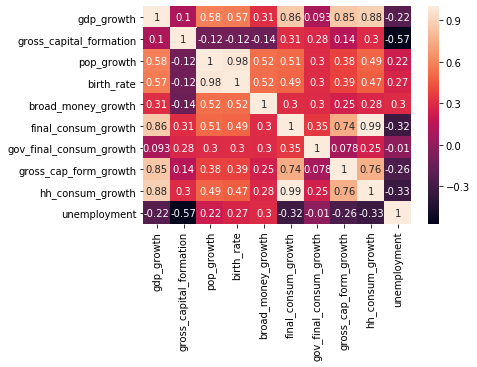

In [17]:
# calculate the correlation matrix
corr = data1.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
sns.heatmap(corr,annot = True) # annot=True will give you value

# Model Building

In [18]:
# define our intput
X_1 = sm.add_constant(X_train)
# create a OLS model
model = sm.OLS(y_train, X_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     27.27
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.45e-11
Time:                        17:46:08   Log-Likelihood:                -68.019
No. Observations:                  38   AIC:                             156.0
Df Residuals:                      28   BIC:                             172.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\ganes\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Multicolinearity (with the help of VIF)

In [19]:
X1=data1.drop(['gdp_growth'],axis=1)
# the VFI does expect a constant term in the data, 
#so we need to add one using the add_constant method
#X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)
series_before

gross_capital_formation      19.212176
pop_growth                  162.241884
birth_rate                  207.024778
broad_money_growth            4.512362
final_consum_growth        4851.838385
gov_final_consum_growth      98.964975
gross_cap_form_growth         4.026634
hh_consum_growth           3726.109127
unemployment                 19.176525
dtype: float64

#  Removing the inSignificant variable  

* Variable will be remove based on P-value (>0.05) one by one

In [20]:
X_train=X_train.drop(['final_consum_growth'],axis=1)

In [21]:
# define our intput
X2 = sm.add_constant(X_train)
# create a OLS model
model2 = sm.OLS(y_train, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     31.77
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.47e-12
Time:                        17:46:09   Log-Likelihood:                -68.021
No. Observations:                  38   AIC:                             154.0
Df Residuals:                      29   BIC:                             168.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [22]:
X1=data1.drop(['gdp_growth','final_consum_growth'],axis=1)
# the VFI does expect a constant term in the data, 
#so we need to add one using the add_constant method
#X1 = sm.add_constant(econ_df_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], index=X1.columns)
series_before

gross_capital_formation     18.875927
pop_growth                 161.972132
birth_rate                 205.702518
broad_money_growth           4.509515
gov_final_consum_growth      6.649093
gross_cap_form_growth        4.000155
hh_consum_growth             8.528824
unemployment                19.152951
dtype: float64

In [23]:
# Removing birth_rate with the help of P-value
X_train=X_train.drop(['birth_rate'],axis=1)

In [24]:
# define our intput
X3 = sm.add_constant(X_train)
# create a OLS model
model3 = sm.OLS(y_train,X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     37.00
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.68e-13
Time:                        17:46:09   Log-Likelihood:                -68.276
No. Observations:                  38   AIC:                             152.6
Df Residuals:                      30   BIC:                             165.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Backward Elimination Method


In [25]:
X = data.drop('gdp_growth', axis = 1)
y = data['gdp_growth']

# Its work on dataframe

In [26]:
#Backward Elimination
cols = list(X.columns) # all column present  in x  
pmax = 1
while (len(cols)>0):  # count of variable should be greater than zero
    p= []
    X_1 = X[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    final_model = sm.OLS(y,X_1).fit() # Regression model
    p = pd.Series(final_model.pvalues.values[1:],index = cols) 
    # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value 
    feature_with_p_max = p.idxmax()   
    # idmax is used to display the variable name which has max P-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['pop_growth', 'final_consum_growth', 'gov_final_consum_growth', 'gross_cap_form_growth']


In [27]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gdp_growth   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     90.71
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.22e-20
Time:                        17:46:10   Log-Likelihood:                -82.719
No. Observations:                  48   AIC:                             175.4
Df Residuals:                      43   BIC:                             184.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.8737      0.572      3.276      0.002       0.720       3.027
pop_growth                  2.1608      0.476      4.541      0.000       1.201       3.121
final_consum_growth         0.6044      0.092      6.576      0.000       0.419       0.790
gov_final_consum_growth    -0.2844      0.091     -3.134      0.003      -0.467      -0.101
gross_cap_form_growth       0.1276      0.024      5.267      0.000       0.079       0.176
==============================================================================
Omnibus:                        0.989   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.818
Skew:                           0.313   Prob(JB):                        0.664
Kurtosis:                       2.866   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

# Homoscedasicity

In [28]:
Data=pd.concat([X_train,y_train],axis=1)

In [29]:
Data['Fitted_value']=final_model.fittedvalues
Data['Residual']=final_model.resid

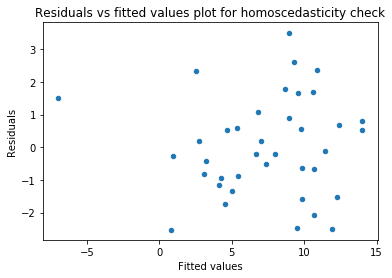

In [30]:
p = Data.plot.scatter(x='Fitted_value',y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

In [31]:
# Run the Breusch-Pagan test
_, pval2, __, f_pval2 = diag.het_breuschpagan(final_model.resid,
                                              final_model.model.exog)
print(pval2, f_pval2)

0.13162274956251446 0.1348496500803121


# Normality

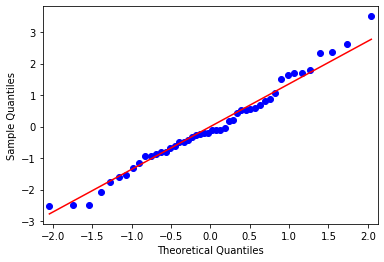

In [32]:
import pylab
# check for the normality of the residuals
sm.qqplot(final_model.resid, line='s')
pylab.show()

# Model Error are IID 

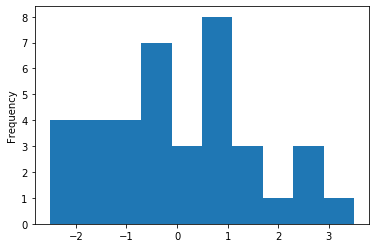

In [33]:
Data['Residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [34]:
X_test2 = X_test[['pop_growth', 'final_consum_growth', 
                  'gov_final_consum_growth', 'gross_cap_form_growth']]

In [35]:
X_test2 = sm.add_constant(X_test2)

In [36]:
X_test2.head()

,const,pop_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth
Year,,,,,
2002,1.0,0.577957,8.284738,5.607038,7.297822
1992,1.0,1.039161,6.777232,6.436623,0.106136
2007,1.0,0.505234,5.298003,6.061820,4.531682
2005,1.0,0.211998,4.441178,4.529687,2.417118
1971,1.0,1.971324,9.330434,8.610547,15.172870


In [37]:
y_predict=final_model.predict(X_test2)

In [38]:
test=pd.concat([X_test,y_test],axis=1)

In [39]:
test['Predicted']=y_predict

In [40]:
test.head()

,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment,gdp_growth,Predicted
Year,,,,,,,,,,,
2002,30.939581,0.577957,10.2,13.999891,8.284738,5.607038,7.297822,8.880712,3.300,7.432434,7.466168
1992,38.485198,1.039161,16.7,14.941525,6.777232,6.436623,0.106136,6.853033,2.513,6.175506,6.398131
2007,32.579531,0.505234,10.0,10.819965,5.298003,6.061820,4.531682,5.098033,3.200,5.463396,5.021625
2005,32.163065,0.211998,8.9,6.989059,4.441178,4.529687,2.417118,4.419130,3.700,3.923677,4.036090
1971,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.570,10.454693,11.259536


# Performance on Test Data set

In [41]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['gdp_growth'], test['Predicted'])
# calculate the mean absolute error
model_mae = mean_absolute_error(test['gdp_growth'], test['Predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.505
MAE 0.52
RMSE 0.711


# Performance on Training Data set

In [42]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data['gdp_growth'], Data['Fitted_value'])
# calculate the mean absolute error
model_mae = mean_absolute_error(Data['gdp_growth'], Data['Fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 2.19
MAE 1.21
RMSE 1.48
